<a href="https://colab.research.google.com/github/SaifullahMnsur/Testing_ML_using_Tensorflow_Keras/blob/main/Training_fruits_vegetables_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data preprocessing

## Training image preprosessing


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Computer Vision Research/Fruits_Vegetables_Recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation image preprocessing


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Computer Vision Research/Fruits_Vegetables_Recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 351 files belonging to 36 classes.


#Model building

In [34]:
cnn = tf.keras.models.Sequential()

##Building convolution layer

In [35]:
# cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64,64, 3]))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [36]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [37]:
# cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [38]:
# cnn.add(tf.keras.layers.Dropout(0.5)) # to avoid overfitting

cnn.add(tf.keras.layers.Dropout(0.25))

In [39]:
cnn.add(tf.keras.layers.Flatten())

In [40]:
# cnn.add(tf.keras.layers.Dense(units=256, activation='relu')) #number of neurons
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [41]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [42]:
cnn.add(tf.keras.layers.Dropout(0.5)) # drop neuron to avoid overfitting

In [43]:
# cnn.add(tf.keras.layers.Dense(units=36, activation='softmax')) #output layer

#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [44]:
# cnn.compile( loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      

In [46]:
# training_history = cnn.fit(x=training_set, validation_data = validation_set, epochs=10)
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 166s 2s/step - loss: 6.0431 - accuracy: 0.0254 - val_loss: 3.5831 - val_accuracy: 0.0256
Epoch 2/32
98/98 [==============================] - 154s 1s/step - loss: 3.5817 - accuracy: 0.0321 - val_loss: 3.5817 - val_accuracy: 0.0370
Epoch 3/32
98/98 [==============================] - 156s 2s/step - loss: 3.5793 - accuracy: 0.0308 - val_loss: 3.5830 - val_accuracy: 0.0313
Epoch 4/32
98/98 [==============================] - 164s 2s/step - loss: 3.5782 - accuracy: 0.0315 - val_loss: 3.5794 - val_accuracy: 0.0313
Epoch 5/32
98/98 [==============================] - 160s 2s/step - loss: 3.5704 - accuracy: 0.0327 - val_loss: 3.5646 - val_accuracy: 0.0370
Epoch 6/32
98/98 [==============================] - 158s 2s/step - loss: 3.5622 - accuracy: 0.0369 - val_loss: 3.5657 - val_accuracy: 0.0427
Epoch 7/32
98/98 [==============================] - 165s 2s/step - loss: 3.5418 - accuracy: 0.0385 - val_loss: 3.5497 - val_accuracy: 0.0513
Epoch 8/32
98

#Evaluating Model

In [47]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 94s 877ms/step - loss: 0.2907 - accuracy: 0.9178
Training accuracy: 0.9178169965744019


In [48]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 13s 258ms/step - loss: 0.5070 - accuracy: 0.9060
Validation accuracy: 0.9059829115867615


##Saving Model

In [49]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
training_history.history # returns dictionary of history

{'loss': [6.04312801361084,
  3.5817463397979736,
  3.5792508125305176,
  3.578181505203247,
  3.5703790187835693,
  3.562197208404541,
  3.5417585372924805,
  3.525606393814087,
  3.4938466548919678,
  3.4277243614196777,
  3.335174322128296,
  3.2651302814483643,
  3.1159682273864746,
  2.9501044750213623,
  2.833589792251587,
  2.610711097717285,
  2.459418535232544,
  2.21229887008667,
  1.9783434867858887,
  1.7956515550613403,
  1.6549015045166016,
  1.5073081254959106,
  1.312591791152954,
  1.26492178440094,
  1.1091265678405762,
  1.0052074193954468,
  0.9131744503974915,
  0.8312162756919861,
  0.7594038248062134,
  0.7142422199249268,
  0.6574622392654419,
  0.6429197788238525],
 'accuracy': [0.025361156091094017,
  0.03210273012518883,
  0.030818618834018707,
  0.03146067261695862,
  0.03274478390812874,
  0.03691813722252846,
  0.03852327540516853,
  0.05425361171364784,
  0.06131621077656746,
  0.09149277955293655,
  0.1062600314617157,
  0.12391653656959534,
  0.15409310

##Record History

In [51]:
# import json
# with open('training_history.json', 'w') as f:
#   json.dump(training_history.history, f)

#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [52]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Calculate Validation Accuracy

In [53]:
##Calculating accurecy achieved on validation set
print('Validations set accuracy: {}%'.format(training_history.history['val_accuracy'][-1]*100))

Validations set accuracy: 90.59829115867615%


#Accuracry visualization

##Training Visualization

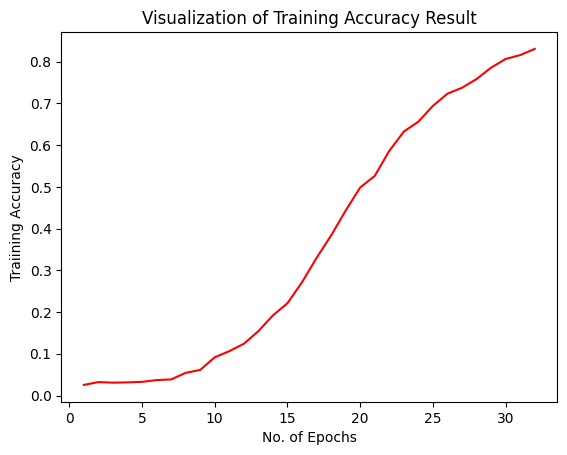

In [54]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation accuracy

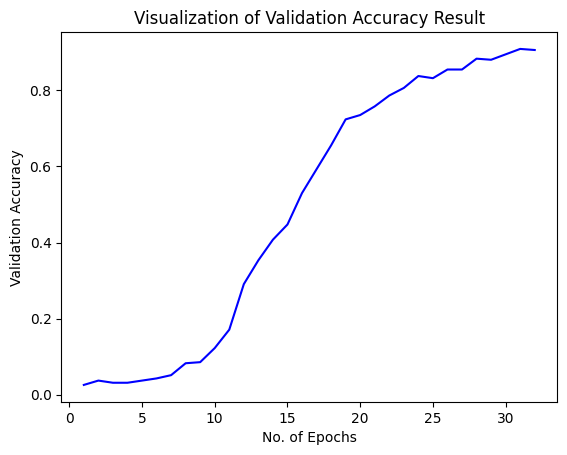

In [55]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Test set evaluation

In [56]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Computer Vision Research/Fruits_Vegetables_Recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [57]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 21s 984ms/step - loss: 0.4957 - accuracy: 0.9081
Test accuracy: 0.9080780148506165
